In [1]:
import os
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../src')
sys.path.append('../../src')
import matplotlib.colors as mcolors

named_colors = list(mcolors.TABLEAU_COLORS)

device = 'cpu'#torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load Models

In [2]:
model_names = sorted(os.listdir('./models_pAE'))
len(model_names)

10

In [3]:
model_loss_history = {}
model_loss_weights = {}

for name in tqdm(model_names):
    model = torch.load(os.path.join('.', 'models_pAE', name)).to(device)
    model_loss_history[name] = np.array(model.loss_history)
    model_loss_weights[name] = {
        'reconstruction': model.reconstruction_loss_weight,
        'reconstruction_dx': model.reconstruction_loss_weight,
        'reconstruction_ddx': model.reconstruction_loss_weight,
    }

100%|██████████| 2/2 [00:02<00:00,  1.27s/it]


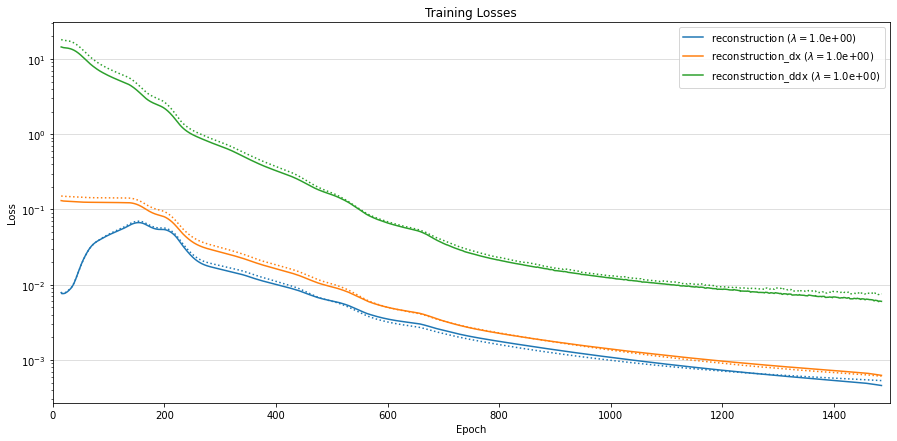

In [11]:
model_name = model_names[0]
training_length = len(model_loss_history[model_name].item()['reconstruction'])
smooth_lengthscale = (training_length // 50)
t = np.arange(training_length)[smooth_lengthscale//2: -smooth_lengthscale//2+1]

fig, ax = plt.subplots(1, 1, figsize=(15, 7))

for k, c in zip(['reconstruction', 'reconstruction_dx', 'reconstruction_ddx'], named_colors):
    v = model_loss_history[model_name].item()[k]
    ax.plot(t, np.convolve(v, np.ones(smooth_lengthscale), 'valid') / smooth_lengthscale, label=k + r' ($\lambda = $' + '{:.1e})'.format(model_loss_weights[model_name][k]), color=c)
    v = model_loss_history[model_name].item()['val_' + k]
    ax.plot(t, np.convolve(v, np.ones(smooth_lengthscale), 'valid') / smooth_lengthscale, color=c, linestyle=':')

ax.set_xlim(0, len(v)); ax.set_yscale('log');
ax.legend(); ax.grid(axis='y', alpha=0.5); ax.set_xlabel('Epoch'); ax.set_ylabel('Loss'); ax.set_title('Training Losses');